In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import time
from time import sleep
from random import randint
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
def parse_html(html):
    data, item = pd.DataFrame(), {}
    soup = BeautifulSoup(html, 'lxml')
    for i, resto in enumerate(soup.find_all('div', class_='location-meta-block')):
        
        name = str(resto.find('div',class_='result-title'))
        item['name'] = BeautifulSoup(name,"lxml").get_text()     
        
        number_reviews = str(resto.find('a',class_='review_count'))
        item['number_reviews'] = BeautifulSoup(number_reviews,"lxml").get_text()
        
        address = str(resto.find('div',class_='address'))
        item['address'] = BeautifulSoup(address,"lxml").get_text()
        
        rating = resto.select('.rating-review-count .ui_bubble_rating')
        item['rating'] = rating[0]['alt']
        data[i] = pd.Series(item)
    return data.T

In [3]:
restaurants = pd.DataFrame()
driver = webdriver.Chrome()
driver.maximize_window()

for i in range(0,991,30): #991
    url = f'https://www.tripadvisor.es/Search?q=Barcelona&searchSessionId=51C8E5CE54DA772C3953CD9DA7D126D31646914148673ssid&searchNearby=false&sid=6CE36F5C961D4332A3DC16D3040AA0ED1646914152244&blockRedirect=true&ssrc=e&rf=36&o={i}'
    driver.get(url)
    x = randint(2,6)
    sleep(x)
    new_data = parse_html(driver.page_source)
    restaurants = pd.concat([restaurants, new_data], ignore_index=True)
    print(len(restaurants))

driver.close()
restaurants

30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020


name    number_reviews  \
0     Barcelona Tapas Puerto Vallarta   2.429 opiniones   
1                           BelleBuon   2.957 opiniones   
2            Fàbrica Moritz Barcelona   2.887 opiniones   
3                       Ciudad Condal  10.183 opiniones   
4                       La Peninsular   2.875 opiniones   
...                               ...               ...   
1015                          GOLIARD     320 opiniones   
1016               Locavore Barcelona     126 opiniones   
1017         Cal Marius 449 #pastrami     249 opiniones   
1018                          The Box   1.085 opiniones   
1019                          Urretxu     159 opiniones   

                                                address             rating  
0     Calle Matamoros 906, Puerto Vallarta, MéxicoCa...  4,5 de 5 burbujas  
1     Travessera de Gràcia 441, Barcelona, Cataluña,...    5 de 5 burbujas  
2     Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...    4 de 5 burbujas  
3     Rambla de Catalunya, 18, Barcelona, Cataluña, ...  4,5 de 5 burbujas  
4     Carrer Del Mar, 29, Barcelona, Cataluña, Españ...  4,5 de 5 burbujas  
...                                                 ...                ...  
1015  Carrer PROGRES, 6, Barcelona, Cataluña, España...  4,5 de 5 burbujas  
1016  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...    5 de 5 burbujas  
1017  Mallorca, 449, Barcelona, Cataluña, EspañaMall...    4 de 5 burbujas  
1018  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...  4,5 de 5 burbujas  
1019  Carrer de la Marina, 64, Barcelona, Cataluña, ...  4,5 de 5 burbujas  

[1020 rows x 4 columns]

In [4]:
restaurants['rating']=restaurants['rating'].str.replace(' de 5 burbujas', '')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace(' opiniones', '')

In [5]:
restaurants['rating']=restaurants['rating'].str.replace(',', '.')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace('.', '')
restaurants['rating'] = restaurants['rating'].astype(float)
restaurants['number_reviews'] = restaurants['number_reviews'].astype(int)

In [6]:
restaurants

name  number_reviews  \
0     Barcelona Tapas Puerto Vallarta            2429   
1                           BelleBuon            2957   
2            Fàbrica Moritz Barcelona            2887   
3                       Ciudad Condal           10183   
4                       La Peninsular            2875   
...                               ...             ...   
1015                          GOLIARD             320   
1016               Locavore Barcelona             126   
1017         Cal Marius 449 #pastrami             249   
1018                          The Box            1085   
1019                          Urretxu             159   

                                                address  rating  
0     Calle Matamoros 906, Puerto Vallarta, MéxicoCa...     4.5  
1     Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0  
2     Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0  
3     Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5  
4     Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5  
...                                                 ...     ...  
1015  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5  
1016  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0  
1017  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0  
1018  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5  
1019  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5  

[1020 rows x 4 columns]

In [7]:
restaurants = restaurants.drop_duplicates()
restaurants

name  number_reviews  \
0     Barcelona Tapas Puerto Vallarta            2429   
1                           BelleBuon            2957   
2            Fàbrica Moritz Barcelona            2887   
3                       Ciudad Condal           10183   
4                       La Peninsular            2875   
...                               ...             ...   
1015                          GOLIARD             320   
1016               Locavore Barcelona             126   
1017         Cal Marius 449 #pastrami             249   
1018                          The Box            1085   
1019                          Urretxu             159   

                                                address  rating  
0     Calle Matamoros 906, Puerto Vallarta, MéxicoCa...     4.5  
1     Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0  
2     Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0  
3     Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5  
4     Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5  
...                                                 ...     ...  
1015  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5  
1016  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0  
1017  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0  
1018  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5  
1019  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5  

[1017 rows x 4 columns]

In [8]:
rest=restaurants

In [9]:
rest=rest[rest['address'].str.contains('Barcelona')]
rest

name  number_reviews  \
1                    BelleBuon            2957   
2     Fàbrica Moritz Barcelona            2887   
3                Ciudad Condal           10183   
4                La Peninsular            2875   
5                 La Patsa Lab            1758   
...                        ...             ...   
1015                   GOLIARD             320   
1016        Locavore Barcelona             126   
1017  Cal Marius 449 #pastrami             249   
1018                   The Box            1085   
1019                   Urretxu             159   

                                                address  rating  
1     Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0  
2     Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0  
3     Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5  
4     Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5  
5     Calle Casanova 94, Barcelona, Cataluña, España...     5.0  
...                                                 ...     ...  
1015  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5  
1016  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0  
1017  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0  
1018  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5  
1019  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5  

[989 rows x 4 columns]

In [10]:
rest.reset_index(drop=True, inplace=True)
rest

name  number_reviews  \
0                   BelleBuon            2957   
1    Fàbrica Moritz Barcelona            2887   
2               Ciudad Condal           10183   
3               La Peninsular            2875   
4                La Patsa Lab            1758   
..                        ...             ...   
984                   GOLIARD             320   
985        Locavore Barcelona             126   
986  Cal Marius 449 #pastrami             249   
987                   The Box            1085   
988                   Urretxu             159   

                                               address  rating  
0    Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0  
1    Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0  
2    Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5  
3    Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5  
4    Calle Casanova 94, Barcelona, Cataluña, España...     5.0  
..                                                 ...     ...  
984  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5  
985  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0  
986  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0  
987  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5  
988  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5  

[989 rows x 4 columns]

In [11]:
def extract_street (s):
    return s.split(',')[0]

rest['street']=rest['address'].apply(extract_street)

In [12]:
def extract_number (s):
    return s.split(',')[1]

rest['number']=rest['address'].apply(extract_number)

In [13]:
rest

name  number_reviews  \
0                   BelleBuon            2957   
1    Fàbrica Moritz Barcelona            2887   
2               Ciudad Condal           10183   
3               La Peninsular            2875   
4                La Patsa Lab            1758   
..                        ...             ...   
984                   GOLIARD             320   
985        Locavore Barcelona             126   
986  Cal Marius 449 #pastrami             249   
987                   The Box            1085   
988                   Urretxu             159   

                                               address  rating  \
0    Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0   
1    Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0   
2    Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5   
3    Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5   
4    Calle Casanova 94, Barcelona, Cataluña, España...     5.0   
..                                                 ...     ...   
984  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5   
985  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0   
986  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0   
987  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5   
988  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5   

                       street      number  
0    Travessera de Gràcia 441   Barcelona  
1        Ronda Sant Antoni 41   Barcelona  
2         Rambla de Catalunya          18  
3              Carrer Del Mar          29  
4           Calle Casanova 94   Barcelona  
..                        ...         ...  
984            Carrer PROGRES           6  
985           Carrer D'aribau         151  
986                  Mallorca         449  
987     Carrer D'en Gignas 30   Barcelona  
988       Carrer de la Marina          64  

[989 rows x 6 columns]

In [14]:
rest['street'] = rest['street'] + rest['number']

In [15]:
rest

name  number_reviews  \
0                   BelleBuon            2957   
1    Fàbrica Moritz Barcelona            2887   
2               Ciudad Condal           10183   
3               La Peninsular            2875   
4                La Patsa Lab            1758   
..                        ...             ...   
984                   GOLIARD             320   
985        Locavore Barcelona             126   
986  Cal Marius 449 #pastrami             249   
987                   The Box            1085   
988                   Urretxu             159   

                                               address  rating  \
0    Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0   
1    Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0   
2    Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5   
3    Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5   
4    Calle Casanova 94, Barcelona, Cataluña, España...     5.0   
..                                                 ...     ...   
984  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5   
985  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0   
986  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0   
987  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5   
988  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5   

                                 street      number  
0    Travessera de Gràcia 441 Barcelona   Barcelona  
1        Ronda Sant Antoni 41 Barcelona   Barcelona  
2                Rambla de Catalunya 18          18  
3                     Carrer Del Mar 29          29  
4           Calle Casanova 94 Barcelona   Barcelona  
..                                  ...         ...  
984                    Carrer PROGRES 6           6  
985                 Carrer D'aribau 151         151  
986                        Mallorca 449         449  
987     Carrer D'en Gignas 30 Barcelona   Barcelona  
988              Carrer de la Marina 64          64  

[989 rows x 6 columns]

In [16]:
rest['street']=rest['street'].str.replace('Barcelona', '')

In [17]:
rest

name  number_reviews  \
0                   BelleBuon            2957   
1    Fàbrica Moritz Barcelona            2887   
2               Ciudad Condal           10183   
3               La Peninsular            2875   
4                La Patsa Lab            1758   
..                        ...             ...   
984                   GOLIARD             320   
985        Locavore Barcelona             126   
986  Cal Marius 449 #pastrami             249   
987                   The Box            1085   
988                   Urretxu             159   

                                               address  rating  \
0    Travessera de Gràcia 441, Barcelona, Cataluña,...     5.0   
1    Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...     4.0   
2    Rambla de Catalunya, 18, Barcelona, Cataluña, ...     4.5   
3    Carrer Del Mar, 29, Barcelona, Cataluña, Españ...     4.5   
4    Calle Casanova 94, Barcelona, Cataluña, España...     5.0   
..                                                 ...     ...   
984  Carrer PROGRES, 6, Barcelona, Cataluña, España...     4.5   
985  Carrer D'aribau, 151, Barcelona, Cataluña, Esp...     5.0   
986  Mallorca, 449, Barcelona, Cataluña, EspañaMall...     4.0   
987  Carrer D'en Gignas 30, Barcelona, Cataluña, Es...     4.5   
988  Carrer de la Marina, 64, Barcelona, Cataluña, ...     4.5   

                        street      number  
0    Travessera de Gràcia 441    Barcelona  
1        Ronda Sant Antoni 41    Barcelona  
2       Rambla de Catalunya 18          18  
3            Carrer Del Mar 29          29  
4           Calle Casanova 94    Barcelona  
..                         ...         ...  
984           Carrer PROGRES 6           6  
985        Carrer D'aribau 151         151  
986               Mallorca 449         449  
987     Carrer D'en Gignas 30    Barcelona  
988     Carrer de la Marina 64          64  

[989 rows x 6 columns]

In [18]:
rest.drop(['number','address'], axis = 1, inplace = True)
rest.rename(columns = {'street':'address'}, inplace = True)
rest['city']='Barcelona'
rest

name  number_reviews  rating  \
0                   BelleBuon            2957     5.0   
1    Fàbrica Moritz Barcelona            2887     4.0   
2               Ciudad Condal           10183     4.5   
3               La Peninsular            2875     4.5   
4                La Patsa Lab            1758     5.0   
..                        ...             ...     ...   
984                   GOLIARD             320     4.5   
985        Locavore Barcelona             126     5.0   
986  Cal Marius 449 #pastrami             249     4.0   
987                   The Box            1085     4.5   
988                   Urretxu             159     4.5   

                       address       city  
0    Travessera de Gràcia 441   Barcelona  
1        Ronda Sant Antoni 41   Barcelona  
2       Rambla de Catalunya 18  Barcelona  
3            Carrer Del Mar 29  Barcelona  
4           Calle Casanova 94   Barcelona  
..                         ...        ...  
984           Carrer PROGRES 6  Barcelona  
985        Carrer D'aribau 151  Barcelona  
986               Mallorca 449  Barcelona  
987     Carrer D'en Gignas 30   Barcelona  
988     Carrer de la Marina 64  Barcelona  

[989 rows x 5 columns]

In [19]:
rest['address']=rest['address'].str.replace('C/', 'Carrer ')
rest['address']=rest['address'].str.replace('c/', 'Carrer ')
rest['address']=rest['address'].str.replace('Calle', 'Carrer ')
rest['address']=rest['address'].str.replace('calle', 'Carrer ')
rest['address']=rest['address'].str.replace('74b', '74')
rest['address']=rest['address'].str.replace('Carreer','Carrer ')
rest['address']=rest['address'].str.replace('Christina ','Cristina  ')
rest['address']=rest['address'].str.replace('[^\w\s]', ' ')

In [20]:
# for i in rest['address']:
#     if i in 're.sub('[^A-Za-z0-9]+', '', mystring)':
#         rest['address']=rest['address'].str.replace(i,'', inplace=True)

In [21]:
# error_check=rest['address'].str.contains('74b')

In [22]:
# rest.iloc[[11]]

In [23]:
rest

name  number_reviews  rating  \
0                   BelleBuon            2957     5.0   
1    Fàbrica Moritz Barcelona            2887     4.0   
2               Ciudad Condal           10183     4.5   
3               La Peninsular            2875     4.5   
4                La Patsa Lab            1758     5.0   
..                        ...             ...     ...   
984                   GOLIARD             320     4.5   
985        Locavore Barcelona             126     5.0   
986  Cal Marius 449 #pastrami             249     4.0   
987                   The Box            1085     4.5   
988                   Urretxu             159     4.5   

                       address       city  
0    Travessera de Gràcia 441   Barcelona  
1        Ronda Sant Antoni 41   Barcelona  
2       Rambla de Catalunya 18  Barcelona  
3            Carrer Del Mar 29  Barcelona  
4         Carrer  Casanova 94   Barcelona  
..                         ...        ...  
984           Carrer PROGRES 6  Barcelona  
985        Carrer D aribau 151  Barcelona  
986               Mallorca 449  Barcelona  
987     Carrer D en Gignas 30   Barcelona  
988     Carrer de la Marina 64  Barcelona  

[989 rows x 5 columns]

In [24]:
rest['address']=rest['address']+' '+rest['city']

In [25]:
from geopy import Nominatim
from geopy.geocoders import Nominatim
import time

In [27]:
%%timeit
# from geopy.extra.rate_limiter import RateLimiter

#Creating an instance of Nominatim Class
geolocator = Nominatim(timeout=10, user_agent="sergiguasch83@gmail.com")

geocode = geolocator.geocode
 
#Applying the method to pandas DataFrame
rest['location'] = rest['address'].apply(geocode)
rest['lat'] = rest['location'].apply(lambda x: x.latitude if x else None)
rest['long'] = rest['location'].apply(lambda x: x.longitude if x else None)

In [28]:
# geolocator = Nominatim(timeout=10, user_agent = "SergiGuasch83@gmail.com")
# lat = []
# long = []
# index = -1

# for i in rest['address']:
#     location = geolocator.geocode(i, timeout=10)
#     index+=1
#     print(index)
#     if location is None:
#         lat.append(None)
#         long.append(None)
#     else:
#         latitude = location.latitude
#         longitude = location.longitude  
    
#     lat.append(latitude)
#     long.append(longitude)

In [29]:
# len(lat), len(long)

In [30]:
# rest['lat'] = pd.DataFrame(lat,columns=['lat'])
# rest['long'] = pd.DataFrame(long,columns=['long'])

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
rest

name  number_reviews  rating  \
0                                           BelleBuon            2957     5.0   
1                            Fàbrica Moritz Barcelona            2887     4.0   
2                                       Ciudad Condal           10183     4.5   
3                                       La Peninsular            2875     4.5   
4                                        La Patsa Lab            1758     5.0   
5                                        Bella Italia            1384     5.0   
6                      Thai Barcelona | Royal Cuisine            1654     4.0   
7                                       Ramen-ya Hiro            1212     4.5   
8                                           Le Romane            2205     5.0   
9                                 Cervecería Catalana           12767     4.5   
10                                             Mirabé            1156     4.5   
11                                        Flax & Kale            5632     4.5   
12                       Can Paixano (La Xampanyeria)            2746     4.5   
13                                          La Flauta            3514     4.5   
14                                    Les Quinze Nits            5898     3.5   
15                                    Piazze D'Italia            1954     4.5   
16                                     Can Culleretes            1916     4.0   
17                                             4 Gats            4796     3.5   
18                                        Can Cortada            1485     4.5   
19                                      Teresa Carles            5042     4.5   
20                                          Bar Tomas             847     3.5   
21                               Casa Lolea Barcelona            2677     4.5   
22                                         Via Veneto             616     4.5   
23                                 9 Reinas Barcelona            1500     4.5   
24                                 Koku Kitchen Ramen             805     4.5   
25                                      PETIT BANGKOK             887     4.5   
26                                           7 Portes            8857     4.0   
27                                     Raco D'en Cesc             594     4.5   
28                                         Bar Cañete            2899     4.5   
29                                Don Kilo Restaurant            1686     5.0   
30                                   Casa Amàlia 1950             708     5.0   
31                                    Carlota Akaneya            1345     4.5   
32                                             Shunka            1122     4.5   
33                                            Vinitus            3875     4.5   
34                                    Babula Bar 1937            1035     5.0   
35                                       Paco Meralgo            2521     4.5   
36                                         Vivo Tapas            2260     4.5   
37                                L’ Amfora Barcelona            1940     4.5   
38                        Season Restaurant Barcelona             557     4.5   
39                                              Tapeo            3162     4.5   
40                            Restaurante La Boqueria            2269     4.5   
41                                       El Xampanyet            2715     4.5   
42                                              Viana            4744     5.0   
43                                La Tasqueta De Blai            2763     4.5   
44                                         El Pachuco            1022     4.5   
45                                    Quimet & Quimet            2082     4.5   
46                                             9 Nine            1636     4.5   
47                     Restaurante Parrilla Alfonsina            1564     4.5   
48                                  Restaurante Kurai             687     4.5   

In [33]:
rest.drop(['location'], axis = 1, inplace = True)

In [51]:
rest.to_csv('restaurants.csv',encoding='utf-8-sig')

In [34]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
gdf = geopandas.GeoDataFrame(rest, geometry=geopandas.points_from_xy(rest['long'], rest['lat']))

In [36]:
gdf

name  number_reviews  rating  \
0                                           BelleBuon            2957     5.0   
1                            Fàbrica Moritz Barcelona            2887     4.0   
2                                       Ciudad Condal           10183     4.5   
3                                       La Peninsular            2875     4.5   
4                                        La Patsa Lab            1758     5.0   
5                                        Bella Italia            1384     5.0   
6                      Thai Barcelona | Royal Cuisine            1654     4.0   
7                                       Ramen-ya Hiro            1212     4.5   
8                                           Le Romane            2205     5.0   
9                                 Cervecería Catalana           12767     4.5   
10                                             Mirabé            1156     4.5   
11                                        Flax & Kale            5632     4.5   
12                       Can Paixano (La Xampanyeria)            2746     4.5   
13                                          La Flauta            3514     4.5   
14                                    Les Quinze Nits            5898     3.5   
15                                    Piazze D'Italia            1954     4.5   
16                                     Can Culleretes            1916     4.0   
17                                             4 Gats            4796     3.5   
18                                        Can Cortada            1485     4.5   
19                                      Teresa Carles            5042     4.5   
20                                          Bar Tomas             847     3.5   
21                               Casa Lolea Barcelona            2677     4.5   
22                                         Via Veneto             616     4.5   
23                                 9 Reinas Barcelona            1500     4.5   
24                                 Koku Kitchen Ramen             805     4.5   
25                                      PETIT BANGKOK             887     4.5   
26                                           7 Portes            8857     4.0   
27                                     Raco D'en Cesc             594     4.5   
28                                         Bar Cañete            2899     4.5   
29                                Don Kilo Restaurant            1686     5.0   
30                                   Casa Amàlia 1950             708     5.0   
31                                    Carlota Akaneya            1345     4.5   
32                                             Shunka            1122     4.5   
33                                            Vinitus            3875     4.5   
34                                    Babula Bar 1937            1035     5.0   
35                                       Paco Meralgo            2521     4.5   
36                                         Vivo Tapas            2260     4.5   
37                                L’ Amfora Barcelona            1940     4.5   
38                        Season Restaurant Barcelona             557     4.5   
39                                              Tapeo            3162     4.5   
40                            Restaurante La Boqueria            2269     4.5   
41                                       El Xampanyet            2715     4.5   
42                                              Viana            4744     5.0   
43                                La Tasqueta De Blai            2763     4.5   
44                                         El Pachuco            1022     4.5   
45                                    Quimet & Quimet            2082     4.5   
46                                             9 Nine            1636     4.5   
47                     Restaurante Parrilla Alfonsina            1564     4.5   
48                                  Restaurante Kurai             687     4.5   

In [37]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [38]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [39]:
type(gdf.geometry[0])

shapely.geometry.point.Point

<AxesSubplot:>

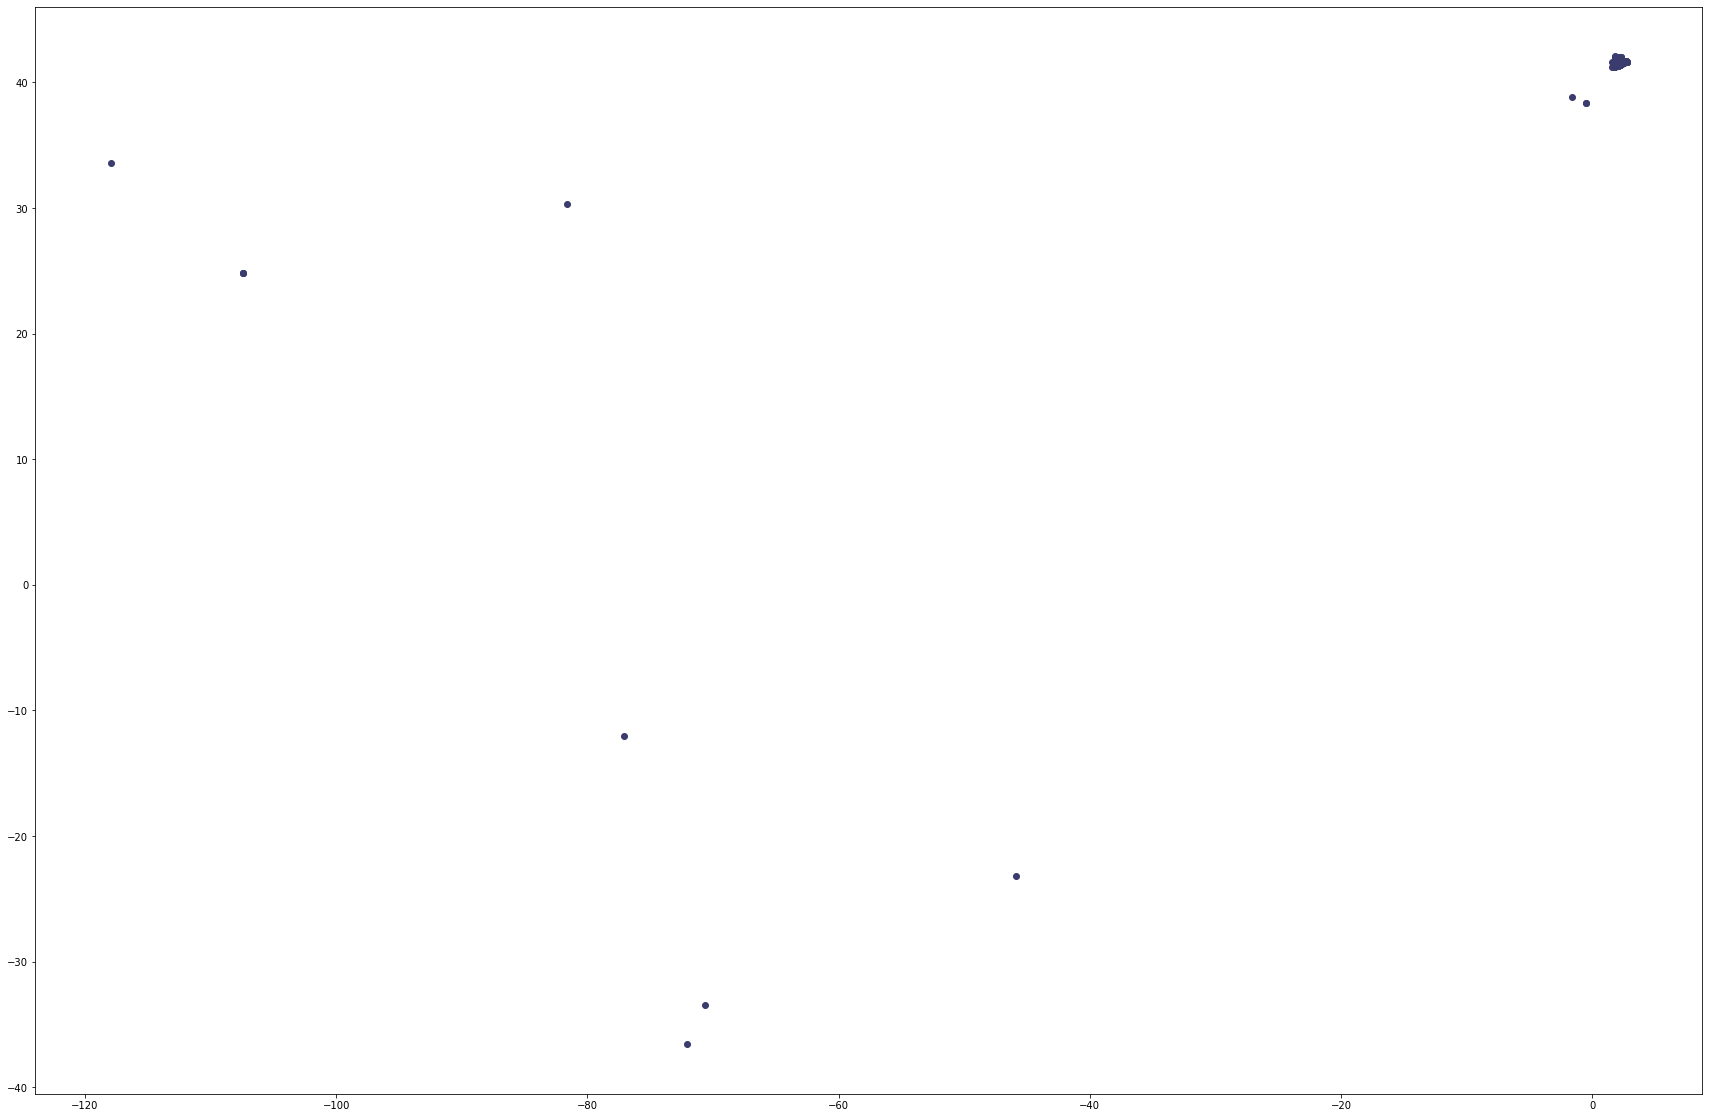

In [40]:
gdf.plot(figsize=(30,20), color='#3B3C6E')

In [41]:
import os
import folium

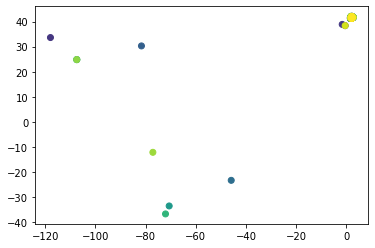

In [42]:
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg='4326')
ax = gdf.plot(cmap="viridis")

In [43]:
# plot map
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(barcelona_map)
barcelona_map

In [44]:
rest

name  number_reviews  rating  \
0                                           BelleBuon            2957     5.0   
1                            Fàbrica Moritz Barcelona            2887     4.0   
2                                       Ciudad Condal           10183     4.5   
3                                       La Peninsular            2875     4.5   
4                                        La Patsa Lab            1758     5.0   
5                                        Bella Italia            1384     5.0   
6                      Thai Barcelona | Royal Cuisine            1654     4.0   
7                                       Ramen-ya Hiro            1212     4.5   
8                                           Le Romane            2205     5.0   
9                                 Cervecería Catalana           12767     4.5   
10                                             Mirabé            1156     4.5   
11                                        Flax & Kale            5632     4.5   
12                       Can Paixano (La Xampanyeria)            2746     4.5   
13                                          La Flauta            3514     4.5   
14                                    Les Quinze Nits            5898     3.5   
15                                    Piazze D'Italia            1954     4.5   
16                                     Can Culleretes            1916     4.0   
17                                             4 Gats            4796     3.5   
18                                        Can Cortada            1485     4.5   
19                                      Teresa Carles            5042     4.5   
20                                          Bar Tomas             847     3.5   
21                               Casa Lolea Barcelona            2677     4.5   
22                                         Via Veneto             616     4.5   
23                                 9 Reinas Barcelona            1500     4.5   
24                                 Koku Kitchen Ramen             805     4.5   
25                                      PETIT BANGKOK             887     4.5   
26                                           7 Portes            8857     4.0   
27                                     Raco D'en Cesc             594     4.5   
28                                         Bar Cañete            2899     4.5   
29                                Don Kilo Restaurant            1686     5.0   
30                                   Casa Amàlia 1950             708     5.0   
31                                    Carlota Akaneya            1345     4.5   
32                                             Shunka            1122     4.5   
33                                            Vinitus            3875     4.5   
34                                    Babula Bar 1937            1035     5.0   
35                                       Paco Meralgo            2521     4.5   
36                                         Vivo Tapas            2260     4.5   
37                                L’ Amfora Barcelona            1940     4.5   
38                        Season Restaurant Barcelona             557     4.5   
39                                              Tapeo            3162     4.5   
40                            Restaurante La Boqueria            2269     4.5   
41                                       El Xampanyet            2715     4.5   
42                                              Viana            4744     5.0   
43                                La Tasqueta De Blai            2763     4.5   
44                                         El Pachuco            1022     4.5   
45                                    Quimet & Quimet            2082     4.5   
46                                             9 Nine            1636     4.5   
47                     Restaurante Parrilla Alfonsina            1564     4.5   
48                                  Restaurante Kurai             687     4.5   

In [45]:
rest.sort_values(by='number_reviews', ascending=False)

name  number_reviews  rating  \
9                                 Cervecería Catalana           12767     4.5   
2                                       Ciudad Condal           10183     4.5   
26                                           7 Portes            8857     4.0   
80                                              Colom            7605     4.5   
94                                           La Fonda            6518     4.0   
216                                       El Nacional            5979     4.0   
14                                    Les Quinze Nits            5898     3.5   
11                                        Flax & Kale            5632     4.5   
82                                  Restaurante Arume            5200     4.5   
278                                           Cera 23            5095     4.5   
19                                      Teresa Carles            5042     4.5   
173                             Restaurante Salamanca            4959     3.5   
139                         Restaurante Los Caracoles            4868     3.5   
17                                             4 Gats            4796     3.5   
42                                              Viana            4744     5.0   
74                                    Bodega Biarritz            4564     5.0   
67                               Bodega Biarritz 1881            4529     4.5   
83                                        Botafumeiro            4471     4.0   
314                                           Rossini            4331     4.5   
329                       La Paradeta Sagrada Familia            4318     4.5   
305                                          Tapas 24            4274     4.0   
121                Taller de Tapas - Rambla Catalunya            4023     4.0   
301                                    Hard Rock Cafe            3962     4.0   
33                                            Vinitus            3875     4.5   
132                                         Tapa Tapa            3783     3.0   
92                                             Arcano            3588     4.5   
13                                          La Flauta            3514     4.5   
179            Buenos Aires Grill Restaurant Eixample            3391     4.5   
144                           Restaurante Barceloneta            3390     4.0   
291                         La Fonda del Port Olimpic            3361     4.0   
39                                              Tapeo            3162     4.5   
319                                         La Pepita            3009     4.5   
143                                     Brunch & Cake            3008     4.0   
0                                           BelleBuon            2957     5.0   
28                                         Bar Cañete            2899     4.5   
266                                          Bar Lobo            2893     4.0   
1                            Fàbrica Moritz Barcelona            2887     4.0   
3                                       La Peninsular            2875     4.5   
184                                       Elsa y Fred            2775     4.5   
43                                La Tasqueta De Blai            2763     4.5   
169                                 Pura Brasa Arenas            2755     4.0   
12                       Can Paixano (La Xampanyeria)            2746     4.5   
41                                       El Xampanyet            2715     4.5   
328                                             Accés            2710     4.5   
176                                 Milk Bar & Bistro            2682     4.5   
265                                La Poma Restaurant            2679     3.0   
21                               Casa Lolea Barcelona            2677     4.5   
62                                              Bacoa            2676     4.5   
279                                           Llamber            2578     4.5   

In [46]:
rest.sort_values(by='lat', ascending=False)

name  number_reviews  rating  \
804                                       Bruc33Tapas            1089     4.0   
130                                        murivecchi             987     4.0   
858                                           Narciso             293     5.0   
411                                 Pura Brasa Rambla             844     4.0   
583                        El Racó - Rambla Catalunya             870     4.0   
362                                   Cachitos Rambla            1690     4.0   
121                Taller de Tapas - Rambla Catalunya            4023     4.0   
984                                           GOLIARD             320     4.5   
777                                 Mishima Sushi Bar             190     4.0   
464                                              Nuba             662     3.5   
929                                          Vi Negre             328     4.0   
44                                         El Pachuco            1022     4.5   
148                                             Louro             964     4.5   
107                                 Giorgio Barcelona             745     4.5   
264                                 Pudding Barcelona             688     3.5   
676                                  Surya Pau Claris             661     4.0   
512                       Asador de Aranda Pau Claris             641     4.0   
514                                   Entrepanes Diaz             341     4.0   
34                                    Babula Bar 1937            1035     5.0   
877                                    Paisano Bistró             874     5.0   
195                                         Avinyo 10            2028     4.5   
718                             Catalunya Restaurante            1270     4.5   
972                                       Momo Avinyó            1908     4.5   
761                      VENUS Delicatessen Barcelona             552     4.0   
544                             The fish & chips shop             851     4.5   
861                                      Tasca I Vins             324     3.5   
217                               Restaurante Igueldo             696     4.5   
827                                      b Restaurant             143     5.0   
283                                         Can Kenji             661     4.5   
261                                    Akashi Gallery             347     4.5   
478                                     Mussol Arenas            1181     3.5   
627                                  La Cachapera Bcn             207     4.5   
845                               Napoli Prima e Dopo             259     4.0   
426                                         Wine Mood             393     5.0   
699                MEXCLA Tapas y Cocteleria Mexicana             324     4.0   
660                 Restaurante Mexicano Chilam Balam             301     3.5   
975                                      La Trocadero             236     4.5   
234                          Tucco Real Food Eixample             347     5.0   
368                                         Panam '75             421     4.5   
244                                   Taverna El Glop            1506     4.0   
125                                            Mayura            1171     4.0   
7                                       Ramen-ya Hiro            1212     4.5   
848                                            Futami             168     4.5   
68                                  Restaurant Etapes            1226     4.5   
889                            Kame House Kitchen BCN             203     4.5   
212                                         El Rincón            1297     4.5   
658                                            Suarna             713     4.0   
433                                       L'Escamarlà             737     3.0   
736                          Gelateria Gocce di Latte             404     4.5   

In [47]:
rest.sort_values(by='long', ascending=False)

name  number_reviews  rating  \
889                            Kame House Kitchen BCN             203     4.5   
68                                  Restaurant Etapes            1226     4.5   
848                                            Futami             168     4.5   
212                                         El Rincón            1297     4.5   
433                                       L'Escamarlà             737     3.0   
699                MEXCLA Tapas y Cocteleria Mexicana             324     4.0   
627                                  La Cachapera Bcn             207     4.5   
845                               Napoli Prima e Dopo             259     4.0   
426                                         Wine Mood             393     5.0   
478                                     Mussol Arenas            1181     3.5   
584                                       Kao Dim Sum             282     3.5   
414                                     Eat Caribbean             314     4.5   
828                            Thai Spicy Restaurante             194     4.5   
672                                GatBlau Restaurant             302     4.5   
51                               Marina Bay Barcelona            1987     4.0   
210                                    Sabes una cosa             334     4.5   
688                              Restaurant Cal Boter             543     4.0   
58                                         Chaka Khan            2226     5.0   
223                                          La Venta             544     4.0   
368                                         Panam '75             421     4.5   
234                          Tucco Real Food Eixample             347     5.0   
263                             La Lola de las Arenas            1754     4.0   
890                                         El Laurel             213     4.5   
660                 Restaurante Mexicano Chilam Balam             301     3.5   
125                                            Mayura            1171     4.0   
7                                       Ramen-ya Hiro            1212     4.5   
961                                 The Clock Terrace              66     4.5   
60                               El Jardinet D'Aribau             767     4.5   
338                                             Chéri            1022     4.0   
361                                           Flamant            1173     3.5   
958                                          La Polpa             539     4.0   
964                           Tribo Sushi & Cocktails             119     4.5   
69                                              Gusto            1728     4.5   
617                                           Trópico             545     4.0   
345                                    Restaurant Ají             320     4.5   
784              Roast Club Specialty Coffee Roasters             348     5.0   
78                                      Taktika Berri             794     4.0   
87                                          Yakumanka             426     4.5   
46                                             9 Nine            1636     4.5   
509                                             Topik             488     4.0   
525                        The Coffee House Barcelona             119     5.0   
951                                       Sabor Persa             259     4.5   
863                          Pizzeria L'Antica Napoli             109     4.5   
929                                          Vi Negre             328     4.0   
833                                   Timesburg Sants             261     4.0   
244                                   Taverna El Glop            1506     4.0   
898                                       Catacroquet             369     3.5   
975                                      La Trocadero             236     4.5   
679                                             Rasoi             323     4.5   

In [48]:
rest_nulls = rest[rest.isna().any(axis=1)]

In [49]:
rest_nulls

name  number_reviews  rating  \
37                           L’ Amfora Barcelona            1940     4.5   
40                       Restaurante La Boqueria            2269     4.5   
57                                  La Carmelina             941     5.0   
59                            Pepito Restaurante            1427     4.5   
64                                         Bacoa            1762     4.5   
70                                     Vai Moana            1685     4.5   
74                               Bodega Biarritz            4564     5.0   
77             N.A.P. Neapolitan Authentic Pizza            1488     4.0   
81                                   Bar del Pla            1654     4.0   
91                                         Parco             737     4.0   
93                                      Mirablau            1180     4.0   
110                                    Telefèric            1397     4.5   
113                                      Bo Kaap             799     4.5   
116                             Terrazza Ravello             826     4.5   
129                                   Sushifresh             483     4.5   
139                    Restaurante Los Caracoles            4868     3.5   
141                         Merendero de la Mari            1325     3.5   
151                                      Pampero             971     4.5   
152                El Clot Restaurante Barcelona            1041     4.5   
153                                   Bar Bacaro             553     4.5   
166                         Pez Vela Chiringuito            1763     4.0   
188                                     Paradiso             674     4.5   
204                        Restaurante Can Fusté             450     4.5   
216                                  El Nacional            5979     4.0   
222                                        Xemei             644     4.0   
232                                   La Fabrica             953     4.5   
242                                         Taps            1105     4.5   
243                                     Tragaluz            1074     4.0   
254                                Monster Sushi            1177     4.5   
258                                        Spark             284     4.5   
262                                       Gorria             567     4.5   
268                                    Tapa Tapa            1737     3.0   
271                        Hidden Cafe Barcelona             144     4.5   
282                              Meson Barcelona              83     3.5   
304                      Restaurante el Porvenir             403     4.5   
316                              El Corte Ingles            1116     4.0   
318                                        Shoko            1485     3.5   
327                                  Palo Cortao             572     4.5   
348                                La Mar Salada            1316     4.0   
360                            La Dolça Herminia             942     3.5   
365                      Bar Restaurante Pinotxo            1198     4.5   
375                                The Sopa Boba            1011     4.5   
382                          La Taberna de Sants             232     4.5   
393                                     La Balsa             430     4.0   
394                     Las Delicias Del Carmelo             558     4.0   
398                                    O MEU LAR             276     4.5   
401                                  Bodega Joan            1637     4.0   
415                                    La Gavina            2045     3.5   
425                            Restaurante Seoul             415     4.5   
435                          Baluard Barceloneta             431     4.5   
463                         Petit Pau Restaurant             832     4.5   
466                                    Abrassame            1582     4.0   
471             

In [50]:
rest_nulls['lat'].isna().sum()

95